<IPython.core.display.Javascript object>


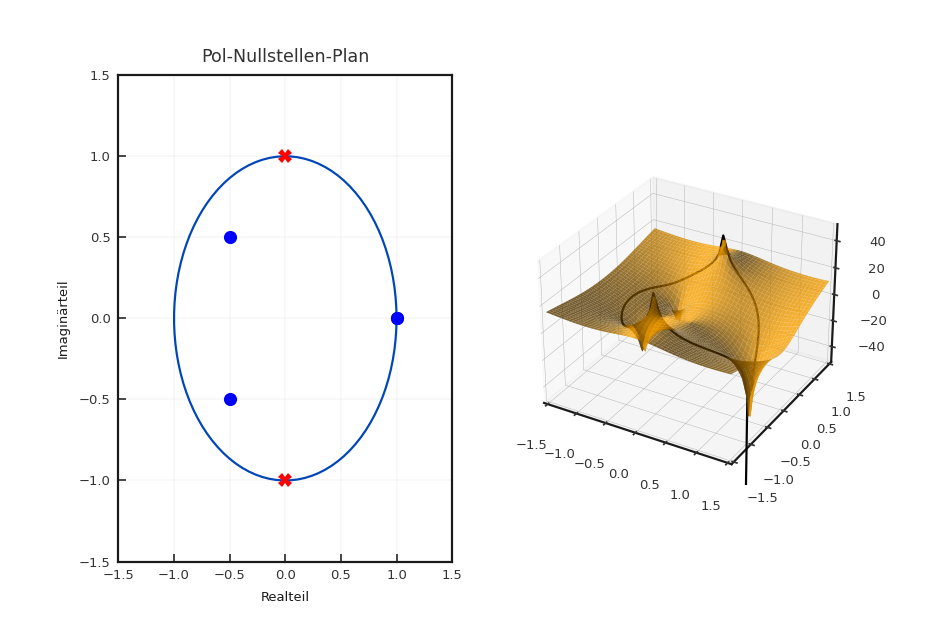

[1j, (0.5+0.5j)]
[-1j, (0.5-0.5j)]


<ipython-input-1-f9e127780e08>:28: RuntimeWarning: divide by zero encountered in true_divide
  H = zaehler/nenner
<ipython-input-1-f9e127780e08>:29: RuntimeWarning: divide by zero encountered in log10
  Z = 20*numpy.log10(numpy.abs(H))
c:\users\ma5997\appdata\local\programs\python\python39\lib\site-packages\numpy\core\numeric.py:1627: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
c:\users\ma5997\appdata\local\programs\python\python39\lib\site-packages\numpy\core\numeric.py:1632: RuntimeWarning: invalid value encountered in subtract
  cp1 -= tmp


In [1]:
# based on https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d_radial.html 

"""
Dem Polnullstellenplan kann per Rechtsklick eine Nullstelle, 
und per Linksklick eine Pollstelle hinzugefügt werden. 
Um eine Pol- / Nullstelle zu löschen muss man, während man auf sie klickt 'Strg' halten. 
Es werden automatisch die konjugierten Pol- / Nullstellen hinzugefügt und gelöscht
"""

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import numpy
import matplotlib
from matplotlib import pyplot

def H_from_pole_zero(C):
    zaehler = numpy.ones_like(C)
    nenner = numpy.ones_like(C)

    for idx in range(len(zeros)):
        null = numpy.multiply(C - zeros[idx], C - zeros_conj[idx])
        zaehler = numpy.multiply(zaehler, null)
        
    for idx in range(len(poles)):
        pole = numpy.multiply(C - poles[idx], C - poles_conj[idx])
        nenner = numpy.multiply(nenner, pole)

    H = zaehler/nenner
    Z = 20*numpy.log10(numpy.abs(H))
    return Z

matplotlib.style.use('sv1_style.mplstyle')

# Create the mesh in polar coordinates and compute corresponding Z.
theta = numpy.linspace(0, 2*numpy.pi, 100)
circle = numpy.exp(1j*theta)

x = numpy.linspace(-1.5, 1.5, 100)
y = numpy.linspace(-1.5j, 1.5j, 100)

poles = [0+1j, 0.5+0.5j]
zeros = [1+0j, -0.5+0.5j]
poles_conj = [0]*2
zeros_conj = [0]*2
fig = pyplot.figure()
ax_pz = fig.add_subplot(121)

ax_pz.plot(circle.real, circle.imag)
ax_pz.set(xlabel=r'Realteil', ylabel=r'Imaginärteil', title='Pol-Nullstellen-Plan', xlim=[-1.5, 1.5], ylim=[-1.5, 1.5])


for idx in range(len(poles)):
    poles_conj[idx] = poles[idx].conjugate()
    zeros_conj[idx] = zeros[idx].conjugate()
    ax_pz.plot([poles[idx].real, poles_conj[idx].real], [poles[idx].imag, poles_conj[idx].imag], marker='X', linestyle='none', color='red')
    ax_pz.plot([zeros[idx].real, zeros_conj[idx].real], [zeros[idx].imag, zeros_conj[idx].imag], marker='o', linestyle='none', color='blue')

print(poles)
print(poles_conj)

X, Y = numpy.meshgrid(x, y)
C = X + Y

Z = H_from_pole_zero(C)

Y = Y.imag

ax_3d = fig.add_subplot(122, projection='3d')
ax_3d = fig.gca(projection='3d')
ax_3d.plot_surface(X,Y,Z, color='orange', alpha=0.8)
X_c = circle.real
Y_c = circle.imag
Z_c = H_from_pole_zero(circle)

ax_3d.plot(X_c, Y_c, Z_c, color='black')

ax_3d.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], zlim=[-50, 50])
ax_3d.set_xlabel(r'$\phi_\mathrm{real}$')
ax_3d.set_ylabel(r'$\phi_\mathrm{im}$')
ax_3d.set_zlabel(r'$H in dB$')

def check_distance(points, loc):
    del_idx = -1
    points_distance = numpy.abs(points - loc)
    print(points_distance)
    for idx in range(len(points_distance)):
        if (points_distance[idx]<0.05):
            del_idx = idx
    return del_idx

def onclick(event):
    global poles, zeros, poles_conj, zeros_conj
    
    if (event.key=="control"): # Delete if doubleclicked
        loc = event.xdata + 1j*event.ydata
        # check if some pole is near it
        del_idx = check_distance(poles, loc)
        print(del_idx)
        
        del_idx_conj = check_distance(poles_conj, loc)
        print(del_idx_conj)

        del_idx = max(del_idx, del_idx_conj)
        
        if (del_idx!=-1):
            del poles[del_idx]
            del poles_conj[del_idx]
        else: # check if some zero is near it
            del_idx = check_distance(zeros, loc)
            del_idx_conj = check_distance(zeros_conj, loc)
            del_idx=max(del_idx, del_idx_conj)
            if (del_idx!=-1):
                del zeros[del_idx]
                del zeros_conj[del_idx]
                
    elif (event.button==1): # setze Polstelle mit einfachem Linksklick
        poles = poles + [event.xdata + 1j*event.ydata]
        poles_conj = poles_conj + [event.xdata - 1j*event.ydata]
    elif (event.button==3): # setze Nullstelle mit einfachem Rechtsklick
        zeros = zeros + [event.xdata + 1j*event.ydata]
        zeros_conj = zeros_conj + [event.xdata - 1j*event.ydata]
        
    ax_pz.cla()
    ax_pz.plot(circle.real, circle.imag)    
    ax_pz.set(xlabel=r'Realteil', ylabel=r'Imaginärteil', title='Pol-Nullstellen-Plan', xlim=[-1.5, 1.5], ylim=[-1.5, 1.5])

    for idx in range(len(poles)):
        ax_pz.plot(poles[idx].real, poles[idx].imag, marker='X', linestyle='none', color='red')
    for idx in range(len(poles_conj)):
        ax_pz.plot(poles_conj[idx].real, poles_conj[idx].imag, marker='X', linestyle='none', color='red')
    for idx in range(len(zeros)):
        ax_pz.plot(zeros[idx].real, zeros[idx].imag, marker='o', linestyle='none', color='blue')
    for idx in range(len(zeros_conj)):
        ax_pz.plot(zeros_conj[idx].real, zeros_conj[idx].imag, marker='o', linestyle='none', color='blue')
    
    Z = H_from_pole_zero(C)
    Z_c = H_from_pole_zero(circle)
    
    ax_3d.cla()
    ax_3d.plot_surface(X, Y, Z, color='orange', alpha=0.8)
    ax_3d.plot(X_c, Y_c, Z_c, color='black')
    ax_3d.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], zlim=[-50, 50])

    fig.canvas.draw_idle()
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

pyplot.show()
